#  <u> Hackerrank Data Challenge</u>
##  <u> Hackerrank Developer Survey </u>

####  Author - Akhila Kotapati
- <b>Goal</b>: To analyze the response data and provide report based on language known, framework used, questions and analyze significant differences with respect to age, education, job level, degree etc.


##  Imports

- Starting out by importing the neccessary modules for the analysis

In [53]:
# Jai Ganesh Deva!!!
import os
import pandas as pd
import numpy as np
import math
import re

#bokeh for visualizations
from bokeh.io import show, output_file,output_notebook,reset_output
from bokeh.layouts import row
from bokeh.plotting import figure,gmap
from bokeh.models import ColumnDataSource,HoverTool,LassoSelectTool,WheelZoomTool,PanTool,GMapOptions, ranges, LabelSet
from bokeh.palettes import Paired10,Spectral4,Magma10,RdYlBu10,PRGn3,viridis,Reds,Magma4,YlOrBr4,Magma8
from bokeh.models import NumeralTickFormatter
from bokeh.models import CustomJSTransform
from bokeh.transform import transform

from bokeh.core.properties import value
from bokeh.transform import dodge
import bokeh.io

from bokeh.models.widgets import Panel, Tabs
#from bokeh.charts import Line

#plotly 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


#Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline



pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

output_notebook()

Loading BokehJS ...

##  Dataset

In [54]:
df_c = pd.read_csv('../input/developer-survey-2018/HackerRank-Developer-Survey-2018-Numeric.csv')
df_v = pd.read_csv('../input/developer-survey-2018/HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (10,19,137,138,250) have mixed types. Specify dtype option on import or set low_memory=False.



- Let us look start our analysis by looking at the data

In [55]:
df_c.describe()

,RespondentID,CountryNumeric2,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q7Level1,q8JobLevel,q8Student,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q15Level2,q16HiringManager,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangGo,q25Scala,q25LangPerl,q25LangSwift,q25LangPascal,q25LangClojure,q25LangPHP,q25LangHaskell,q25LangLua,q25LangR,q25LangRust,q25LangTypescript,q25LangKotlin,q25LangJulia,q25LangErlang,q25LangOcaml,q26FrameLearnAngularJS,q26FrameLearnReact,q26FrameLearnVueDotjs,q26FrameLearnEmber,q26FrameLearnBackboneDotjs,q26FrameLearnSpring,q26FrameLearnJSF,q26FrameLearnStruts,q26FrameLearnDjango,q26FrameLearnPyramid,q26FrameLearnRubyonRails,q26FrameLearnPadrino,q26FrameLearnASP,q26FrameLearnNetCore,q26FrameLearnNodeDotjs,q26FrameLearnExpressJS,q26FrameLearnMetero,q26FrameLearnCocoa,q26FrameLearnReactNative,q26FrameLearnRubyMotion,q26FrameLearnPadrino2,q26FrameLearnDjango2,q26FrameLearnPyramid2,q28LoveC,q28LoveCPlusPlus,q28LoveJava,q28LovePython,q28LoveRuby,q28LoveJavascript,q28LoveCSharp,q28LoveGo,q28LoveScala,q28LovePerl,q28LoveSwift,q28LovePascal,q28LoveClojure,q28LovePHP,q28LoveHaskell,q28LoveLua,q28LoveR,q28LoveRust,q28LoveKotlin,q28LoveTypescript,q28LoveErlang,q28LoveJulia,q28LoveOCaml,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotjs,q29FrameLoveExpressJS,q29FrameLoveMeteor,q29FrameLoveCocoa,q29FrameLoveReactNative,q29FrameLoveRubyMotion,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q31Level3,q34PositiveExp
count,2.509000e+04,21099.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.00000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.0,25090.0,25090.0,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.00000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,25090.000000,250

####  Mapping dataset values
- Mapping the values from "Value-Mapping" to "Developer-Survey" dataset.
- This method will regex to match the columns and will map the values accordingly.

In [ ]:
col = df_c.columns.tolist()

df_c[col] = df_c[col].astype(str)
df_v['Value'] = df_v['Value'].astype(str)

df_v["Data"] = df_v["Data Field"] + df_v["Value"]
df_v = df_v.transpose()
df_v = df_v.rename(columns=df_v.iloc[3]).drop(df_v.index[3])
df_v = df_v.reset_index(drop=True)

lst = ['q8JobLevel10','q8JobLevel11','q9CurrentRole10','q9CurrentRole11','q9CurrentRole12','q9CurrentRole13',
      'q9CurrentRole14','q9CurrentRole15','q9CurrentRole16','q9CurrentRole17','q9CurrentRole18','q9CurrentRole19',
      'q10Industry10','q10Industry11','q10Industry12','q10Industry13','q10Industry14','q10Industry15','q10Industry16'
      ,'q10Industry17','q10Industry18','q10Industry19','q10Industry20']

va = df_v.columns.tolist()
for i in range(len(df_c)):
    for j in va:
        if j not in lst:
            k = j[:-1]
        else:
            k = j[:-2]
        if df_c[k][i] == df_v[j][1]:
            df_c[k][i] = df_v[j][2]

In [ ]:
#Saving the data set
#df_c.to_csv('Hackerrank-Developer-WithValues.csv')

####  Getting the datset ready for the analysis!

- Before we could start analysing the dataset, we will perform few operations on the dataset that would
    help us with the analysis.
- We'll create a new group of age: "0 - 18", "18 - 34" and "35+"
- Merging the values in a given column (like 'q4Education', 'q5DegreeFocus', 'q8JobLevel') with its respective "Other"
    column values.
- Removing columns with 100% null values.

In [ ]:
#Creating a new column named "q2AgeModified" for age values of "0 - 18", "18 - 34" and "35+"
df_c['q2AgeModified']=''

for i in range(len(df_c)):
    if (df_c['q2Age'][i]=='18 - 24 years old') or (df_c['q2Age'][i]=='25 - 34 years old'):
        df_c['q2AgeModified'][i] = '18 - 34'
    elif (df_c['q2Age'][i]=='Under 12 years old') or (df_c['q2Age'][i]=='12 - 18 years old'):
        df_c['q2AgeModified'][i] = '0 - 18'
    elif (df_c['q2Age'][i]=='35 - 44 years old') or (df_c['q2Age'][i]=='45 - 54 years old') or (df_c['q2Age'][i]=='55 - 64 years old') or (df_c['q2Age'][i]=='65 - 74 years old') or (df_c['q2Age'][i]=='75 years or older'):
        df_c['q2AgeModified'][i] = '35+'
    elif (df_c['q2Age'][i]=='#NULL!'):
        df_c['q2AgeModified'][i] = ''
    else:
        print("not given:",df_c['q2AgeModified'][i])


#Filling the null values in 'q4Education', 'q5DegreeFocus', 'q8JobLevel' with 'Other', if the developer has given a
# value in their other respective columns.
for i in range(len(df_c)):
    if df_c['q4Education'][i] == '#NULL!' and str(df_c['q0004_other'][i])!= 'nan':
        df_c['q4Education'][i] = 'Other'
    if str(df_c['q5DegreeFocus'][i]) == 'nan' and str(df_c['q0005_other'][i]) != 'nan':
        df_c['q5DegreeFocus'][i] = 'Other'
    if str(df_c['q8JobLevel'][i]) == 'nan' and str(df_c['q0008_other'][i]) != 'nan':
        df_c['q8JobLevel'][i] = 'Other'


# Creating a new column 'level'.
#This column consists of the count of correct answers given by the developer (0,1,2,3,4)
df_c['level'] = ''
for i in range(len(df_c)):
    k = 0
    if (df_c['q7Level1'][i] == 'C') or (df_c['q7Level1'][i] == 1):
        k = k + 1
    if (df_c['q15Level2'][i]=='prints "Hello, World!" n times') or (df_c['q15Level2'][i]==1):
        k = k + 1
    if (df_c['q31Level3'][i]=='num%2 == 0') or (df_c['q31Level3'][i]==1):
        k = k + 1
    if (df_c['q36Level4'][i]=='Queue') or (df_c['q36Level4'][i]==2):
        k = k + 1
    df_c['level'][i] = k

In [56]:
# checking missing data in values_data 
null_val = df_c.isnull().sum().sort_values(ascending = False)
percentage = (df_c.isnull().sum()/df_c.isnull().count()*100).sort_values(ascending = False)
missing_val  = pd.concat([null_val, percentage], axis=1, keys=['Null_Value', 'Percentage'])
missing_val.head(45)

,Null_Value,Percentage
q0035_other,24881,99.166999
q0017_other,24811,98.888003
q0019_other,24795,98.824233
q0012_other,24773,98.736548
q28LoveOther,24719,98.521323
q0032_other,24708,98.477481
q0004_other,24630,98.166600
q0006_other,24601,98.051016
q0020_other,24540,97.807892
q0022_other,24523,97.740136


- All these columns have more than 85% of missing values.
- These columns can be removed from the dataset as they do not contribute anything in analysing the data!

In [ ]:
#Removing columns with 100% missing values
null_col = missing_val.head(3)
null_col = null_col.index.values.tolist()
for i in null_col:
    df_c.drop(i, axis=1, inplace=True)

In [57]:
#Saving the dataframe updated with the new columns and the modified columns.
#df_c.to_csv('Hackerrank-updated.csv')
#df_c = pd.read_csv('../input/myhacker/Hackerrank-updated.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (5,12,21,139,140) have mixed types. Specify dtype option on import or set low_memory=False.



##  Modified Dataset

- Let us look at the new modified dataset

In [58]:
df_c.shape

(25090, 252)

In [59]:
df_c.describe()

,Unnamed: 0,Unnamed: 0.1,RespondentID,q34PositiveExp,level
count,25090.000000,25090.000000,2.509000e+04,9017.000000,25090.000000
mean,12544.500000,12544.500000,6.474331e+09,4.040590,3.716062
std,7243.003463,7243.003463,8.666438e+06,1.024497,0.541079
min,0.000000,0.000000,6.454811e+09,0.000000,0.000000
25%,6272.250000,6272.250000,6.464812e+09,4.000000,4.000000
50%,12544.500000,12544.500000,6.477487e+09,4.000000,4.000000
75%,18816.750000,18816.750000,6.479849e+09,5.000000,4.000000
max,25089.000000,25089.000000,6.490930e+09,5.000000,4.000000


In [60]:
#Checking the datatype distribution
df_c.get_dtype_counts().to_frame()

,0
float64,1
int64,4
object,247


In [61]:
df_c.head(5)

,Unnamed: 0,Unnamed: 0.1,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q15Level2,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfGo,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPascal,q22LangProfClojure,q22LangProfPHP,q22LangProfHaskell,q22LangProfLua,q22LangProfR,q22LangProfOther,q0022_other,q23FrameAngularJS,q23FrameReact,q23FrameVueDotJS,q23FrameEmber,q23FrameBackboneDotJS,q23FrameSpring,q23FrameJSF,q23FrameStruts,q23FrameNodeDotJS,q23FrameExpressJS,q23FrameMeteor,q23FrameDjango,q23FramePyramid,q23FrameRubyonRails,q23FramePadrino,q23FrameASP,q23FrameNetCore,q23FrameCocoa,q23FrameReactNative,q23FrameRubyMotion,q23FrameOther,q0023_other,q24VimorEmacs,q0024_other,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangGo,q25Scala,q25LangPerl,q25LangSwift,q25LangPascal,q25LangClojure,q25LangPHP,q25LangHaskell,q25LangLua,q25LangR,q25LangRust,q25LangTypescript,q25LangKotlin,q25LangJulia,q25LangErlang,q25LangOcaml,q25LangOther,q26FrameLearnAngularJS,q26FrameLearnReact,q26FrameLearnVueDotjs,q26FrameLearnEmber,q26FrameLearnBackboneDotjs,q26FrameLearnSpring,q26FrameLearnJSF,q26FrameLearnStruts,q26FrameLearnDjango,q26FrameLearnPyramid,q26FrameLearnRubyonRails,q26FrameLearnPadrino,q26FrameLearnASP,q26FrameLearnNetCore,q26FrameLearnNodeDotjs,q26FrameLearnExpressJS,q26FrameLearnMetero,q26FrameLearnCocoa,q26FrameLearnReactNative,q26FrameLearnRubyMotion,q0026_other,q27EmergingTechSkill,q0027_other,q28LoveC,q28LoveCPlusPlus,q28LoveJava,q28LovePython,q28LoveRuby,q28LoveJavascript,q28LoveCSharp,q28LoveGo,q28LoveScala,q28LovePerl,q28LoveSwift,q28LovePascal,q28LoveClojure,q28LovePHP,q28LoveHaskell,q28LoveLua,q28LoveR,q28LoveRust,q28LoveKotlin,q28LoveTypescript,q28LoveErlang,q28LoveJulia,q28LoveOCaml,q28LoveOther,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotjs,q29FrameLoveExpressJS,q29FrameLoveMeteo

In [ ]:
#df_c = pd.read_csv('../input/myhacker/Hackerrank-updated.csv')

##  Analysis

- Let us start by exploring different demographic aspects of the respondents like gender, age, country participated in the survey.


### Gender Distribution

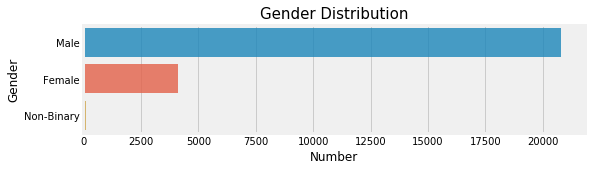

In [62]:
temp_series = df_c[df_c['q3Gender']!='#NULL!']['q3Gender'].value_counts()
plt.figure(figsize=(8,2))
sns.barplot(y=temp_series.index, x=temp_series.values, alpha=0.8)
plt.xlabel('Number', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title("Gender Distribution", fontsize=15)
plt.show()

-  There is a large gender imbalance with almost 80% male developers and only 20% are female developers, that means only 1 in 5 developers is a women.

### Country Distribution

We will consider the top 10 countries from where majority of the developers are:

In [63]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True)
ag = df_c['CountryNumeric2'].value_counts().head(10)
trace = go.Bar(
    x=ag.index,
    y=ag.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = ag.values,
        colorscale='Portland',
        showscale=True
    ),
)
layout = go.Layout(
    title='Top Countries'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

-	A large part of Hackerrank Developers are from India and United States.
-	We can observe the disparity between India & US vs rest of the world. Note that United Kingdom stood in 5th place.

### Age Distribution

In [64]:
#Age Distribution
temp = df_c["q2Age"].value_counts(ascending=False, dropna=True)
temp=temp.to_frame()
temp=temp.rename(index={'#NULL!':'Not Specified'})
ms = temp.sort_values("q2Age",ascending = False)
source = ColumnDataSource(data=dict(names=ms.index, value=ms.values, color=Magma10))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'            ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(x_range=ms.index.tolist(),y_range = (0,14000), plot_height=800,plot_width = 1000, title = "Age Distribution",toolbar_location= 'right', tools=[hover, TOOLS])
p.vbar(x='names', top='value', width=0.7, color= 'color', legend="names",source=source)
p.title.align = "center"

p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Age'
p.yaxis[0].axis_label = 'Number of Listings'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_orientation = math.pi/4

p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.y_range.start = 0
p.background_fill_color = "white"

show(p)

- We can observe that majority of the respondents are between 18 - 34 age group, especially from the graph, we can observe that younger generation between 18 - 24 is the most popular age bracket. This age group are interested in participating or developing code at Hackerrank community and one can see the passion for coding welling up in them. The discrepancy between the developers in their early 20s and late 20s is the largest untapped market here.
- Also, you can see that there are notable number of respondents at ages of 45 and 64, may be taking an interest in new endeavor.

##  Let us see how developers answered the code questions

In [65]:
ans = df_c['level'].value_counts()
trace = go.Bar(
    x=ans.index,
    y=ans.values,
    marker=dict(
        color = ans.values,
        colorscale='Portland',
        showscale=True
    ),
    name = 'Number of correct answers'
)
layout = go.Layout(
    title='Total number of developers answered correctly',
    xaxis=dict(
        title='Number of correct answers',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Developers',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

- As expected, majority of developers, almost 75%, got all the questions correctly.
- Next, most of the remaining developers got three answers correctly, with less than 3.3% developers answering between 0 - 2 questions correctly.
- The questions posed in the survey are basic programming questions, so, we can say that almost 25% of developers at Hackerrank are still novice programmers.

### <font color='Black'> Answers to code questions among different age groups

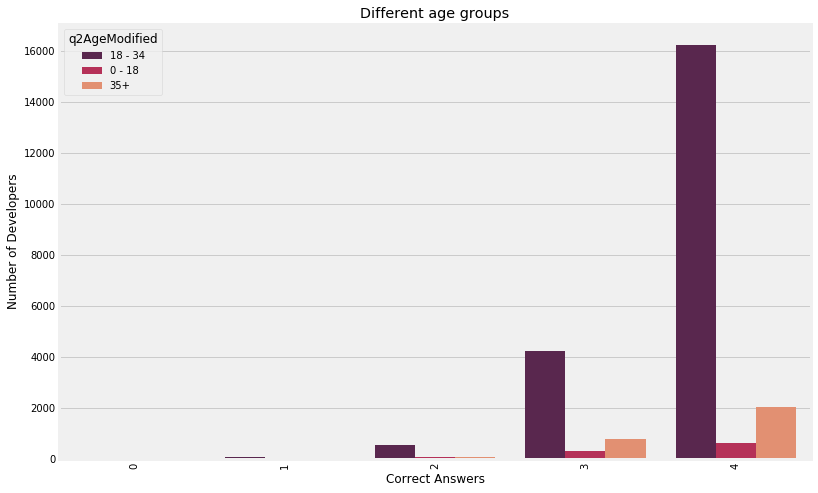

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(x='level', hue='q2AgeModified', data=df_c, palette="rocket")
plt.ylabel('Number of Developers', fontsize=12)
plt.xlabel('Correct Answers', fontsize=12)
plt.xticks(rotation=90)
plt.title("Different age groups")
plt.show()

- From the above plot, we can observe that be it among different age groups or all the developers combined, the graph of correctly answered questions is the same.

### <font color='Black'> Answers to code questions among different Education Levels

In [67]:
#Replacing values of #NULL! as 'Not Specified'

for i in range(len(df_c)):
    if df_c['q4Education'][i]=='#NULL!':
        df_c['q4Education'][i] = 'Not Specified'
    if df_c['q5DegreeFocus'][i]=='#NULL!':
        df_c['q5DegreeFocus'][i] = 'Not Specified'
    if df_c['q8JobLevel'][i]=='#NULL!':
        df_c['q8JobLevel'][i] = 'Not Specified'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



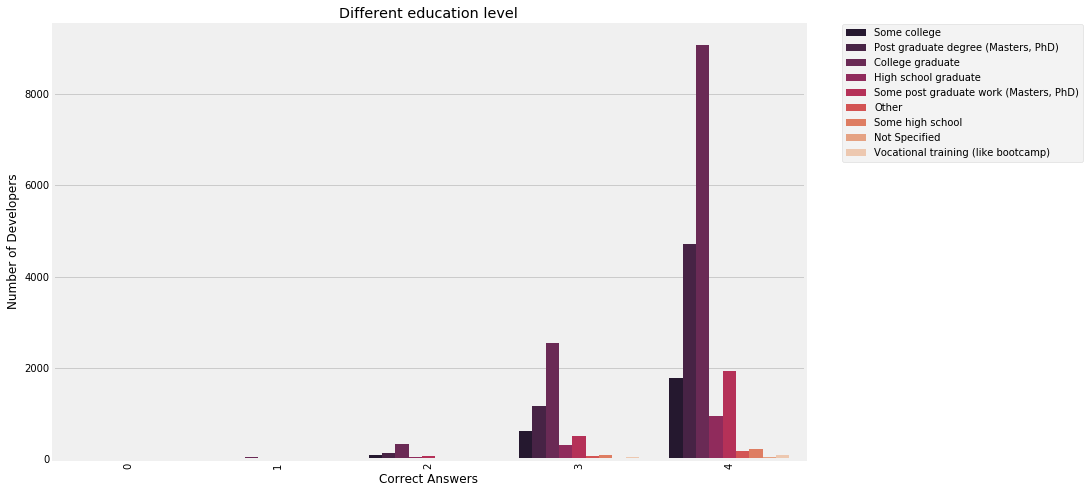

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(x='level', hue='q4Education', data=df_c, palette="rocket")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Number of Developers', fontsize=12)
plt.xlabel('Correct Answers', fontsize=12)
plt.xticks(rotation=90)
plt.title("Different education level")
plt.show()

### <font color='Black'> Answers to code questions among different Degree Focus


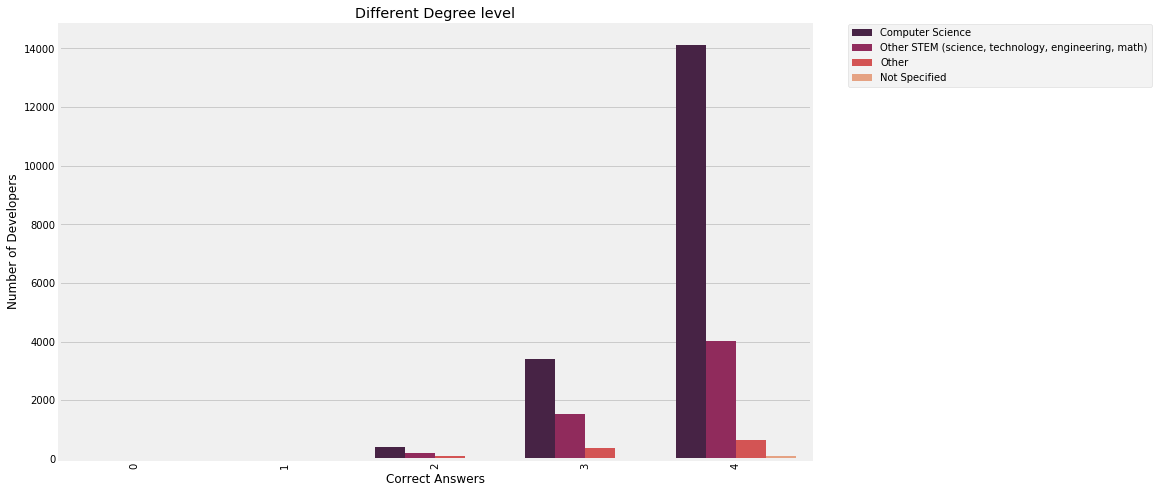

In [69]:
plt.figure(figsize=(12,8))
sns.countplot(x='level', hue='q5DegreeFocus', data=df_c, palette="rocket")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Number of Developers', fontsize=12)
plt.xlabel('Correct Answers', fontsize=12)
plt.xticks(rotation=90)
plt.title("Different Degree level")
plt.show()

### <font color='Black'> Answers to code questions among different job level


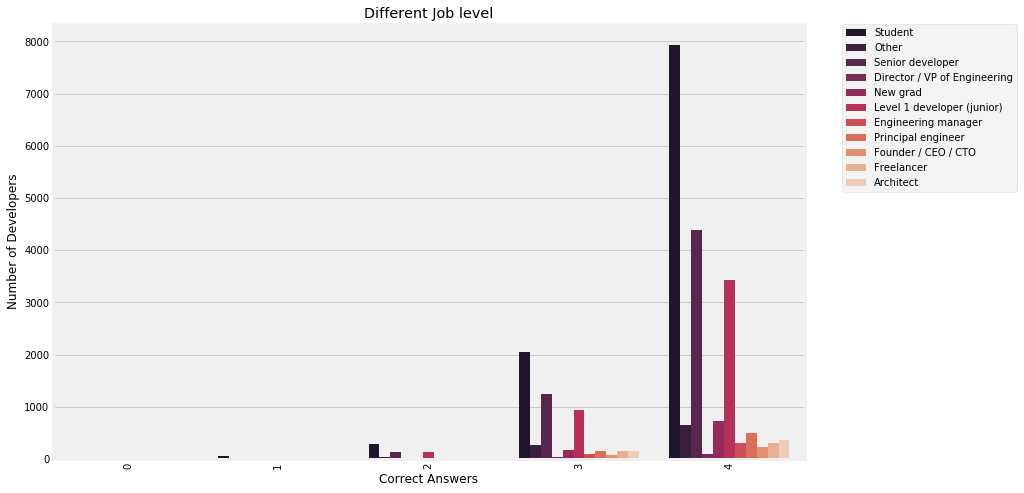

In [70]:
plt.figure(figsize=(12,8))
sns.countplot(x='level', hue='q8JobLevel', data=df_c, palette="rocket")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Number of Developers', fontsize=12)
plt.xlabel('Correct Answers', fontsize=12)
plt.xticks(rotation=90)
plt.title("Different Job level")
plt.show()

- On exploring all the above categories, we can conclude that be it any demographic area, the ratio among number of correctly answered hasn't changed.

##  How did developers learn to code?


- Before exploring the ways developers have learnt to code. Let us consider their education qualifications.

In [71]:
edu = df_c['q4Education'].value_counts()

trace = go.Scatter(
    x=edu.index,
    y=edu.values,
    mode='markers',
    marker=dict(
        symbol='star-diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        color = edu.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Education level of Developers'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

- hmmm....most of them are college graduates!!

In [ ]:


col = df_c.columns.tolist()
q6 = []
for i in range(len(col)):
    if re.match(r'^(q6)',col[i]):
        q6.append(col[i])

        
names = ['University','Self Taught','Accelerated Training','Don\'t know how to code','Other']
trace = []
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']
for i in range(len(q6)):
    trace.append ( 
        go.Bar(
            x = names[i],
            y=df_c[q6[i]].count(),
            name=names[i],
            marker = dict(
                color=colors[i],
            )
        )
    )
layout = go.Layout(
    title='How developers learned to code'
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig)

- Surprisingly, number of developers who learn to code in School or University is equal to the number of developers that learned by themselves!!! I must say even I'm among one of those self taught developers :)
- Though most of the developers are college graduates as seen from Education Level graph, they learny coding by themselves.
- And others, as low as 10% of developers learned through other platforms and few don't know how to code.

## Age Distribution: Young, Middle and Older

- Now let us categorize developers into younger, middle and older generation.

In [72]:
#Age Distribution between '0-18','18-34','35+'
temp = df_c["q2AgeModified"].value_counts()
temp=temp.to_frame()
temp.sort_index(inplace=True)
temp=temp.rename(index={'':'Not Specified'})
temp['Percentage'] = round((temp["q2AgeModified"]/temp["q2AgeModified"].sum())*100,2)
temp['Percent']=  temp['Percentage'].astype(str) + '%'
#ms = temp.sort_values("q2Age",ascending = False)
source = ColumnDataSource(data=dict(names=temp.index.tolist(), value=temp['Percentage'].values,my_label=temp['Percent'].values,  color=viridis(3)))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'  ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(x_range=temp.index.tolist(),y_range = (0,100), plot_height=500,plot_width = 600, title = "Number of Developers at Different Age Group",toolbar_location= 'right', tools=[hover, TOOLS])
p.vbar(x='names', top='value', width=0.7, color= 'color', legend="names",source=source)
p.title.align = "center"

p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Age Group'
p.yaxis[0].axis_label = 'Number of Developers(%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
#p.yaxis.formatter = NumeralTickFormatter(format='%')
#p.xaxis.major_label_orientation = math.pi/2


#source.data['my_label'] =temp['Percentage'].values.astype(str) + '%'

labels = LabelSet(x='names', y='value', text='my_label', level='glyph',
              x_offset=5, y_offset=5,text_font_size="12pt", text_color="#555555", source=source, render_mode='canvas',text_align='center')

p.add_layout(labels)
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.y_range.start = 0
p.background_fill_color = "white"

show(p)

## Education Level

In [75]:
#Education Level in all Age Groups
temp2 = df_c["q4Education"].value_counts(ascending=False, dropna=True)
temp2=temp2.to_frame()
ms = temp2.sort_values("q4Education",ascending = False)
ms = ms.drop(['Not Specified'])
source = ColumnDataSource(data=dict(names=ms.index, value=ms.values, color=Magma8))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'  ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(x_range=ms.index.tolist(),y_range = (0,14000), plot_height=800,plot_width = 800, title = "Education Level of Developers",toolbar_location= 'right', tools=[hover, TOOLS])
p.vbar(x='names', top='value', width=0.5, color= 'color', legend="names",source=source)
p.title.align = "center"
p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Education'
p.yaxis[0].axis_label = 'Number of Developers'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_orientation = math.pi/4
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.y_range.start = 0
p.background_fill_color = "white"

show(p)

## Education Level among different age groups

In [76]:
#Education Level among different age groups

#bokeh.io.reset_output()
#bokeh.io.output_notebook()


edu = df_c.groupby(['q2AgeModified', 'q4Education']).size().reset_index().pivot(columns='q2AgeModified', index='q4Education', values=0)
edu_list = edu.index.values.tolist()

data = {'Education' : edu_list,
        'yo'   : edu['0 - 18'].values.tolist(),
        'mi'   : edu['18 - 34'].values.tolist(),
        'ol'   : edu['35+'].values.tolist()}

source = ColumnDataSource(data=data)
hover = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'yo',  '@yo' ),
    ])
hover1 = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'mi',  '@mi' ),
    ])
hover2 = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'ol',  '@ol' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

#visulaizing "0-18"
p = figure(x_range=edu_list, y_range=(0, 1000), plot_height=700,plot_width=700, title="Education Level by Age",
           toolbar_location= 'right', tools=[hover, TOOLS])
p.vbar(x='Education', top='yo', width=0.5, color='darkblue',source=source)
p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Education Level'
p.yaxis[0].axis_label = 'Number of Developers'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = math.pi/4
tab = Panel(child=p,title="0 - 18")

#visulalising "18-34"
p1 = figure(x_range=edu_list, y_range=(0, 12000), plot_height=700,plot_width=700, title="Education Level by Age",
           toolbar_location= 'right', tools=[hover1, TOOLS])
p1.vbar(x='Education', top='mi', width=0.5, color='green',source=source)
p1.title.text_color = "Green"
p1.title.text_font_size = "18px"
p1.xaxis[0].axis_label = 'Education Level'
p1.yaxis[0].axis_label = 'Number of Developers'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"
p1.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.xaxis.major_label_orientation = math.pi/4
tab1 = Panel(child=p1,title="18 - 34")

#visulalising "35+"
p2 = figure(x_range=edu_list, y_range=(0, 2000), plot_height=700,plot_width=700, title="Education Level by Age",
           toolbar_location= 'right', tools=[hover2, TOOLS])
p2.vbar(x='Education', top='ol', width=0.5, color='gold',source=source)
p2.title.text_color = "Green"
p2.title.text_font_size = "18px"
p2.xaxis[0].axis_label = 'Education Level'
p2.yaxis[0].axis_label = 'Number of Developers'
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.x_range.range_padding = 0.1
p2.xgrid.grid_line_color = None
p2.xaxis.major_label_orientation = math.pi/4
tab2 = Panel(child=p2,title="35+")

tabs = Tabs(tabs=[ tab,tab1, tab2 ])
show(tabs)

- Among 0 – 18, believe it or not, there are equal number of college graduates and post-graduates. Even, in middle age, most of the developers are college graduates and post graduates, but this is expected because that’s the average age to attend college and University. And almost, 90% of older generation hold college degrees.

## Degree Focus among different age groups

In [77]:
#Degree Focus among different age groups

bokeh.io.reset_output()
bokeh.io.output_notebook()


edu = df_c.groupby(['q2AgeModified', 'q5DegreeFocus']).size().reset_index().pivot(columns='q2AgeModified', index='q5DegreeFocus', values=0)
edu_list = edu.index.values.tolist()

data = {'Education' : edu_list,
        'yo'   : edu['0 - 18'].values.tolist(),
        'mi'   : edu['18 - 34'].values.tolist(),
        'ol'   : edu['35+'].values.tolist()}

source = ColumnDataSource(data=data)
hover = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'yo',  '@yo' ),
    ])
hover1 = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'mi',  '@mi' ),
    ])
hover2 = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'ol',  '@ol' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

#visulaizing "0-18"
p = figure(x_range=edu_list, y_range=(0, 1000), plot_height=700,plot_width=700, title="Degree Focus by Age",
           toolbar_location= 'right', tools=[hover, TOOLS])
p.vbar(x='Education', top='yo', width=0.5, color='darkblue',source=source)
p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Degree'
p.yaxis[0].axis_label = 'Number of Developers'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = math.pi/4
tab = Panel(child=p,title="0 - 18")

#visulalising "18-34"
p1 = figure(x_range=edu_list, y_range=(0, 20000), plot_height=700,plot_width=700, title="Degree Focus by Age",
           toolbar_location= 'right', tools=[hover1, TOOLS])
p1.vbar(x='Education', top='mi', width=0.5, color='green',source=source)
p1.title.text_color = "Green"
p1.title.text_font_size = "18px"
p1.xaxis[0].axis_label = 'Degree'
p1.yaxis[0].axis_label = 'Number of Developers'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"
p1.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.xaxis.major_label_orientation = math.pi/4
tab1 = Panel(child=p1,title="18 - 34")

#visulalising "35+"
p2 = figure(x_range=edu_list, y_range=(0, 2000), plot_height=700,plot_width=700, title="Degree Focus by Age",
           toolbar_location= 'right', tools=[hover2, TOOLS])
p2.vbar(x='Education', top='ol', width=0.5, color='gold',source=source)
p2.title.text_color = "Green"
p2.title.text_font_size = "18px"
p2.xaxis[0].axis_label = 'Degree'
p2.yaxis[0].axis_label = 'Number of Developers'
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.x_range.range_padding = 0.1
p2.xgrid.grid_line_color = None
p2.xaxis.major_label_orientation = math.pi/4
tab2 = Panel(child=p2,title="35+")

tabs = Tabs(tabs=[ tab,tab1, tab2 ])
show(tabs)

Loading BokehJS ...

- Be it any age group, most of the developers are focused in Computer Science and Other STEM degrees. This says though it’s a small amount, developers other than computer science degree are interested in participating in Hackerrank Community, may be as a hobby or interested in pursuing a new career.

## Job Level among different age groups

In [78]:
#Job Level among different age groups

bokeh.io.reset_output()
bokeh.io.output_notebook()


edu = df_c.groupby(['q2AgeModified', 'q8JobLevel']).size().reset_index().pivot(columns='q2AgeModified', index='q8JobLevel', values=0)
edu_list = edu.index.values.tolist()

data = {'Education' : edu_list,
        'yo'   : edu['0 - 18'].values.tolist(),
        'mi'   : edu['18 - 34'].values.tolist(),
        'ol'   : edu['35+'].values.tolist()}

source = ColumnDataSource(data=data)
hover = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'yo',  '@yo' ),
    ])
hover1 = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'mi',  '@mi' ),
    ])
hover2 = HoverTool(tooltips=[
        ( 'Education',   '@Education'  ),
        ( 'ol',  '@ol' ),
    ])

TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

#visulaizing "0-18"
p = figure(x_range=edu_list, y_range=(0, 1000), plot_height=700,plot_width=700, title="Job Level by Age",
           toolbar_location= 'right',tools=[hover,TOOLS])
p.vbar(x='Education', top='yo', width=0.5, color='darkblue',source=source)
p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Job Level'
p.yaxis[0].axis_label = 'Number of Developers'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = math.pi/4
tab = Panel(child=p,title="0 - 18")

#visulalising "18-34"
p1 = figure(x_range=edu_list, y_range=(0, 12000), plot_height=700,plot_width=700, title="Job Level by Age",
           toolbar_location= 'right',tools=[hover,TOOLS])
p1.vbar(x='Education', top='mi', width=0.5, color='green',source=source)
p1.title.text_color = "Green"
p1.title.text_font_size = "18px"
p1.xaxis[0].axis_label = 'Job Level'
p1.yaxis[0].axis_label = 'Number of Developers'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"
p1.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.xaxis.major_label_orientation = math.pi/4
tab1 = Panel(child=p1,title="18 - 34")

#visulalising "35+"
p2 = figure(x_range=edu_list, y_range=(0, 2000), plot_height=700,plot_width=700, title="job Level by Age",
           toolbar_location= 'right',tools=[hover,TOOLS])
p2.vbar(x='Education', top='ol', width=0.5, color='gold',source=source)
p2.title.text_color = "Green"
p2.title.text_font_size = "18px"
p2.xaxis[0].axis_label = 'Job Level'
p2.yaxis[0].axis_label = 'Number of Developers'
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.x_range.range_padding = 0.1
p2.xgrid.grid_line_color = None
p2.xaxis.major_label_orientation = math.pi/4
tab2 = Panel(child=p2,title="35+")

tabs = Tabs(tabs=[ tab,tab1, tab2 ])
show(tabs)

Loading BokehJS ...

- As youngsters most of them are students. If you observe, there are 14 Developers among 0-18 age group that declare themselves as Founder/ CEO/ CTO,  this is quite staggering.
- Even in middle age there are more number of students. However, they are also involved in other professions.
- Developers over 35+ are mostly senior developers.

In [79]:
val_map = pd.read_csv('../input/developer-survey-2018/HackerRank-Developer-Survey-2018-Codebook.csv')
val_map = val_map.transpose()
val_map = val_map.rename(columns=val_map.iloc[0]).drop(val_map.index[0])
val_map.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q15Level2,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfGo,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPascal,q22LangProfClojure,q22LangProfPHP,q22LangProfHaskell,q22LangProfLua,q22LangProfR,q22LangProfOther,q0022_other,q23FrameAngularJS,q23FrameReact,q23FrameVueDotJS,q23FrameEmber,q23FrameBackboneDotJS,q23FrameSpring,q23FrameJSF,q23FrameStruts,q23FrameNodeDotJS,q23FrameExpressJS,q23FrameMeteor,q23FrameDjango,q23FramePyramid,q23FrameRubyonRails,q23FramePadrino,q23FrameASP,q23FrameNetCore,q23FrameCocoa,q23FrameReactNative,q23FrameRubyMotion,q23FrameOther,q0023_other,q24VimorEmacs,q0024_other,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangGo,q25Scala,q25LangPerl,q25LangSwift,q25LangPascal,q25LangClojure,q25LangPHP,q25LangHaskell,q25LangLua,q25LangR,q25LangRust,q25LangTypescript,q25LangKotlin,q25LangJulia,q25LangErlang,q25LangOcaml,q25LangOther,q26FrameLearnAngularJS,q26FrameLearnReact,q26FrameLearnVueDotjs,q26FrameLearnEmber,q26FrameLearnBackboneDotjs,q26FrameLearnSpring,q26FrameLearnJSF,q26FrameLearnStruts,q26FrameLearnDjango,q26FrameLearnPyramid,q26FrameLearnRubyonRails,q26FrameLearnPadrino,q26FrameLearnASP,q26FrameLearnNetCore,q26FrameLearnNodeDotjs,q26FrameLearnExpressJS,q26FrameLearnMetero,q26FrameLearnCocoa,q26FrameLearnReactNative,q26FrameLearnRubyMotion,q26FrameLearnPadrino2,q26FrameLearnDjango2,q26FrameLearnPyramid2,q0026_other,q27EmergingTechSkill,q0027_other,q28LoveC,q28LoveCPlusPlus,q28LoveJava,q28LovePython,q28LoveRuby,q28LoveJavascript,q28LoveCSharp,q28LoveGo,q28LoveScala,q28LovePerl,q28LoveSwift,q28LovePascal,q28LoveClojure,q28LovePHP,q28LoveHaskell,q28LoveLua,q28LoveR,q28LoveRust,q28LoveKotlin,q28LoveTypescript,q28LoveErlang,q28LoveJulia,q28LoveOCaml,q28LoveOther,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotj

In [80]:
col = df_c.columns.tolist()
q25 = []
for i in range(len(col)):
    if re.match(r'^(q25)',col[i]):
        q25.append(col[i])
        
q25.remove('q25LangOther')

uk = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia',
'Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania',
'Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovak Republic','Slovenia',
'Spain','Sweden','United Kingdom']

na = ['Antigua and Barbuda','The Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba',
'Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras',
'Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines',
'Trinidad and Tobago','United States']

knows = []
learn = []
column = []
kn_us = []
kn_uk = []
kn_stu = []
kn_prof = []
l_us = []
l_uk = []
l_stu = []
l_prof = []
kn_ag = []
kn_ag1 = []
kn_ag2 = []
for i in q25:
    column.append(val_map[i]['Survey Question'])
    kn_ag.append(df_c[(df_c[i] == 'Know') & (df_c['q2AgeModified'] == '0 - 18')][i].count())
    kn_ag1.append(df_c[(df_c[i] == 'Know') & (df_c['q2AgeModified'] == '18 - 34')][i].count())
    kn_ag2.append(df_c[(df_c[i] == 'Know') & (df_c['q2AgeModified'] == '35+')][i].count())
    knows.append(df_c[df_c[i] == 'Know'][i].count())
    learn.append(df_c[df_c[i] == 'Will Learn'][i].count())
    kn_us.append(df_c[(df_c[i] == 'Know') & (df_c['CountryNumeric2'].isin(na))][i].count())
    kn_uk.append(df_c[(df_c[i] == 'Know') & (df_c['CountryNumeric2'].isin(uk))][i].count())
    kn_stu.append(df_c[(df_c[i] == 'Know') & (df_c['q8JobLevel'] == 'Student')][i].count())
    kn_prof.append(df_c[(df_c[i] == 'Know') & (df_c['q8JobLevel'] != 'Student')& (str(df_c['q8JobLevel']) != 'nan')][i].count())
    l_us.append(df_c[(df_c[i] == 'Will Learn') & (df_c['CountryNumeric2'].isin(na))][i].count())
    l_uk.append(df_c[(df_c[i] == 'Will Learn') & (df_c['CountryNumeric2'].isin(uk))][i].count())
    l_stu.append(df_c[(df_c[i] == 'Will Learn') & (df_c['q8JobLevel'] == 'Student')][i].count())
    l_prof.append(df_c[(df_c[i] == 'Will Learn') & (df_c['q8JobLevel'] != 'Student')& (str(df_c['q8JobLevel']) != 'nan')][i].count())


c = (knows/sum(knows))*100
g = [ '%.2f%% ' % elem for elem in c ]

c_us = (kn_us/sum(kn_us))*100
g_us = [ '%.2f%% ' % elem for elem in c_us ]

c_uk = (kn_uk/sum(kn_uk))*100
g_uk = [ '%.2f%% ' % elem for elem in c_uk ]

c_stu = (kn_stu/sum(kn_stu))*100
g_stu = [ '%.2f%% ' % elem for elem in c_stu ]

c_prof = (kn_prof/sum(kn_prof))*100
g_prof = [ '%.2f%% ' % elem for elem in c_prof ]

c_l = (learn/sum(learn))*100
g_l = [ '%.2f%% ' % elem for elem in c_l ]

c_usl = (l_us/sum(l_us))*100
g_usl = [ '%.2f%% ' % elem for elem in c_usl ]

c_ukl = (l_uk/sum(l_uk))*100
g_ukl = [ '%.2f%% ' % elem for elem in c_ukl ]

c_stul = (l_stu/sum(l_stu))*100
g_stul = [ '%.2f%% ' % elem for elem in c_stul ]

c_profl = (l_prof/sum(l_prof))*100
g_profl = [ '%.2f%% ' % elem for elem in c_profl ]


q28 = []
for i in range(len(col)):
    if re.match(r'^(q28)',col[i]):
        q28.append(col[i])

lov = []      
for i in range(len(q28)):
    for j in range(len(skill)):
        if val_map[q28[i]][0] == skill['lang'][j]:
            lov.append(df_c[df_c[q28[i]] == 'Love'][q28[i]].count())
    
skill = pd.DataFrame({'lang': column,
        'know_val':knows,'know': c,'North_A':c_us,'Europe':c_uk,'Students':c_stu,'Professionals':c_prof,
    'label':g,'label_us':g_us,'label_uk':g_uk,'label_stu':g_stu,'label_prof':g_prof,'Learn':c_l,'label_l':g_l
                      ,'LearnNorth_A':c_usl,'LearnEurope':c_ukl,'LearnStudents':c_stul,'LearnProfessionals':c_profl,
    'label_usl':g_usl,'label_ukl':g_ukl,'label_stul':g_stul,'label_profl':g_profl, 'Age1':kn_ag,'Age2':kn_ag1,
                      'Age3':kn_ag2,'Love':lov
    })
skill = skill.sort_values(by='know',ascending=False)
skill = skill.reset_index()


In [81]:
skill

,index,lang,know_val,know,North_A,Europe,Students,Professionals,label,label_us,label_uk,label_stu,label_prof,Learn,label_l,LearnNorth_A,LearnEurope,LearnStudents,LearnProfessionals,label_usl,label_ukl,label_stul,label_profl,Age1,Age2,Age3,Love
0,2,Java,17244,15.916118,15.933192,15.045119,17.067440,15.242109,15.92%,15.93%,15.05%,17.07%,15.24%,3.062326,3.06%,2.487095,3.153579,3.725899,2.368495,2.49%,3.15%,3.73%,2.37%,441,14812,1969,14649
1,0,C,17190,15.866277,12.732919,12.559475,19.692046,13.626586,15.87%,12.73%,12.56%,19.69%,13.63%,1.528483,1.53%,2.443779,2.323137,1.721374,1.326796,2.44%,2.32%,1.72%,1.33%,516,14836,1806,13208
2,1,C++,15054,13.894760,12.036055,11.148482,17.092436,12.022770,13.89%,12.04%,11.15%,17.09%,12.02%,2.923721,2.92%,3.718009,4.467571,3.330387,2.498512,3.72%,4.47%,3.33%,2.50%,521,12891,1624,13068
3,5,Javascript,14094,13.008685,14.024390,12.977851,10.863370,14.264600,13.01%,14.02%,12.98%,10.86%,14.26%,4.825136,4.83%,4.328051,4.835488,6.037544,3.557442,4.33%,4.84%,6.04%,3.56%,344,11806,1929,11577
4,3,Python,12914,11.919552,13.816088,11.665299,13.635455,10.915024,11.92%,13.82%,11.67%,13.64%,10.92%,6.689793,6.69%,5.353211,7.085042,6.100466,7.305993,5.35%,7.09%,6.10%,7.31%,481,10995,1418,16121
5,13,PHP,7371,6.803393,5.627935,7.136998,6.449033,7.010843,6.80%,5.63%,7.14%,6.45%,7.01%,3.871748,3.87%,3.645815,2.869757,5.027791,2.662991,3.65%,2.87%,5.03%,2.66%,154,6248,957,5143
6,6,C#,6491,5.991158,6.680806,7.301066,4.146878,7.070840,5.99%,6.68%,7.30%,4.15%,7.07%,4.670450,4.67%,4.483269,4.436035,5.671995,3.623234,4.48%,4.44%,5.67%,3.62%,162,5235,1088,6612
7,18,Typescript,2538,2.342560,2.537494,3.027071,1.064840,3.090566,2.34%,2.54%,3.03%,1.06%,3.09%,4.673513,4.67%,4.966971,5.403133,3.824776,5.560951,4.97%,5.40%,3.82%,5.56%,34,2117,386,2757
8,4,Ruby,2524,2.329638,3.419936,2.280558,1.314803,2.923746,2.33%,3.42%,2.28%,1.31%,2.92%,5.952354,5.95%,5.840523,4.940608,6.244288,5.647107,5.84%,4.94%,6.24%,5.65%,51,2013,456,4116
9,16,R,2238,2.065662,2.507196,1.911403,2.312153,1.921360,2.07%,2.51%,1.91%,2.31%,1.92%,5.352753,5.35%,5.071653,4.625250,5.110189,5.606379,5.07%,4.63%,5.11%,5.61%,25,1958,248,3284


## Visualizing Languages Known to Developers

In [82]:
#Visualizing Languages Known to Developers

source = ColumnDataSource(data=dict(names=skill['lang'].values, value=skill['know'].values,my_label=skill['label'].values))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'  ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(x_range=skill['lang'].values,y_range = (0,17), plot_height=750,plot_width = 700, title = "Languages known to developers")
p.vbar(x='names', top='value', width=0.5, color= 'thistle',source=source, legend="Know")
p.title.align = "center"



p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Education'
p.yaxis[0].axis_label = 'Developers (%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_orientation = math.pi/4


labels = LabelSet(x='names', y='value', text='my_label', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='center')

p.add_layout(labels)

p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.y_range.start = 0
p.background_fill_color = "white"


p.line(x=skill['lang'].values, y=skill['Learn'].values, color="skyblue", line_width=2, legend="Will Learn")
p.square(x=skill['lang'].values, y=skill['Learn'].values, size=5, color="olive", alpha=0.9)

show(p)

- The core languages like Java, C are popularly known among developers (almost 15% among languages known), following C++, JavaScript and Python. Developers are keen on learning the  languages  that they are not familiar with. Though most people know Python, many more are inclining towards mastering the language. 
- Developers want to learn languages that they don’t know. Especially, one thing we can observe from this graph is that languages like Scala, Kotlin, Go, R and Ruby  are top languages the developers like to learn.  The reasons could be: eager to learn new language, popularity of data science or increasing demands by the industry.

## Visualizing languages known among different categories

In [83]:
bokeh.io.reset_output()
bokeh.io.output_notebook()

#Visualizing languages known to students and professionals
data = {'Lang' : skill['lang'].tolist(),
        'Students'   : skill['Students'].tolist(),
        'Professionals'   : skill['Professionals'].tolist(),
       'Europe'   : skill['Europe'].tolist(),
        'North_A'   : skill['North_A'].tolist(),
       'a1':skill['Age1'].tolist(),
       'a2':skill['Age2'].tolist(),
       'a3':skill['Age3'].tolist()}

source = ColumnDataSource(data=data)

p = figure(x_range=skill['lang'].tolist(), y_range=(0,20), plot_height=800,plot_width=700, title="Languages known to different Students vs Professional",
           toolbar_location= 'right')

p.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Students', width=0.3, source=source,
       color="khaki", legend=value("Students"),name="Students")

p.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='Professionals', width=0.3, source=source,
       color="cornflowerblue", legend=value("Professionals"),name="Professionals")

p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Languages'
p.yaxis[0].axis_label = 'Developers (%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = math.pi/4

p.line(x=skill['lang'].values, y=skill['LearnStudents'].values, color="skyblue", line_width=2, legend="Students willing to learn")
p.square(x=skill['lang'].values, y=skill['LearnStudents'].values, size=5, color="olive", alpha=0.9)

p.line(x=skill['lang'].values, y=skill['LearnProfessionals'].values, color="green", line_width=2, legend="Professionals willing to learn")
p.square(x=skill['lang'].values, y=skill['LearnProfessionals'].values, size=5, color="olive", alpha=0.9)

tab1 = Panel(child=p, title="Students vs Professionals")


#visualizing North America vs Europe
p1 = figure(x_range=skill['lang'].tolist(), y_range=(0,20), plot_height=800,plot_width=700, title="Languages known to Developers in North America and Europe",
           toolbar_location= 'right')

p1.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Europe', width=0.3, source=source,
       color="khaki", legend=value("Europe"),name="Europe")

p1.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='North_A', width=0.3, source=source,
       color="cornflowerblue", legend=value("North America"),name="North_A")

p1.title.text_color = "Green"
p1.title.text_font_size = "18px"
p1.xaxis[0].axis_label = 'Languages'
p1.yaxis[0].axis_label = 'Developers (%)'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"

#p.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.legend.orientation = "vertical"
p1.legend.location = "top_right"
p1.xaxis.major_label_orientation = math.pi/4

p1.line(x=skill['lang'].values, y=skill['LearnEurope'].values, color="orange", line_width=2, legend="Europeans willing to learn")
p1.square(x=skill['lang'].values, y=skill['LearnEurope'].values, size=5, color="olive", alpha=0.9)

p1.line(x=skill['lang'].values, y=skill['LearnNorth_A'].values, color="green", line_width=2, legend="North Americans willing to learn")
p1.square(x=skill['lang'].values, y=skill['LearnNorth_A'].values, size=5, color="olive", alpha=0.9)


tab2 = Panel(child=p1, title="Europe vs North America")

#Visualizing by age group
p2 = figure(x_range=skill['lang'].tolist(), y_range=(0,15000), plot_height=800,plot_width=700, title="Languages known to different age groups",
           toolbar_location= 'right')
p2.vbar(x=dodge('Lang', -0.30,  range=p.x_range), top='a1', width=0.3, source=source,
       color="red", legend="0-18",name="0-18")
p2.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='a2', width=0.3, source=source,
       color="orange", legend="18-34",name="18-34")

p2.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='a3', width=0.3, source=source,
       color="yellow", legend="35+",name="35+")

p2.title.text_color = "Green"
p2.title.text_font_size = "18px"
p2.xaxis[0].axis_label = 'Languages'
p2.yaxis[0].axis_label = 'Developers (%)'
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.xgrid.grid_line_color = None
p2.legend.orientation = "vertical"
p2.legend.location = "top_right"
p2.xaxis.major_label_orientation = math.pi/4

tab3 = Panel(child=p2, title="Age Group")
tabs = Tabs(tabs=[ tab1, tab2,tab3 ])

show(tabs)

Loading BokehJS ...

Students vs Professionals:
- Students are more skilled at languages like JAVA, C, C++ and Python than professionals, whereas,  more number of professionals are adept at languages like JavaScript, PHP, C#, Typescript, Ruby, Pascal, Scala, Perl, Swift and Go.
- While more number of students are willing to learn JavaScript, PHP, C#, Ruby, more number of professionals want to Python, Go and Kotlin.


Europe vs North America:
- More number of North American Developers know top 5 languages than Developers in Europe.
- And Europe Developers seem to other less popular languages like Pascal, Haskell, and PHP and C# better than North America.
- And as far as learning graph is concerned for both the continents, there is very little variance between each other. The graph is similar to the overall developers graph.

Age groups:
-	When analyzed among different age groups, youngsters have notable percentage only among top languages. The ratio of all the languages between middle age and older is similar except in languages like JavaScript, Pascal and Perl.

## Top Skills Known to Developers

In [84]:
#bokeh.io.reset_output()
#bokeh.io.output_notebook()

#Top skills known to developers
skil = skill.head(10)

data = {'Lang' : skil['lang'].tolist(),
        'Students'   : skil['Students'].tolist(),
        'Professionals'   : skil['Professionals'].tolist(),
       'Europe'   : skil['Europe'].tolist(),
        'North_A'   : skil['North_A'].tolist(),
       'label_stu':skil['label_stu'].tolist(),
       'label_prof':skil['label_prof'].tolist(),
       'label_uk':skil['label_uk'].tolist(),
       'label_us':skil['label_us'].tolist(),
       'a1':skil['Age1'].tolist(),
       'a2':skil['Age2'].tolist(),
       'a3':skil['Age3'].tolist()}

source = ColumnDataSource(data=data)
hover = HoverTool(tooltips="@Education $name: @$name")
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
#Visualizing by age group
p2 = figure(x_range=skil['lang'].tolist(), y_range=(0,20000), plot_height=800,plot_width=700, title="Top languages known to different age groups",
           toolbar_location= 'right')
p2.vbar(x=dodge('Lang', -0.30,  range=p.x_range), top='a1', width=0.3, source=source,
       color="red", legend="0-18",name="0-18")
p2.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='a2', width=0.3, source=source,
       color="orange", legend="18-34",name="18-34")

p2.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='a3', width=0.3, source=source,
       color="yellow", legend="35+",name="35+")

p2.title.text_color = "Green"
p2.title.text_font_size = "18px"
p2.xaxis[0].axis_label = 'Languages'
p2.yaxis[0].axis_label = 'Developers (%)'
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.xgrid.grid_line_color = None
p2.legend.orientation = "vertical"
p2.legend.location = "top_right"
p2.xaxis.major_label_orientation = math.pi/4

tab3 = Panel(child=p2, title="Age Group")

#Visulalizing Students vs Professionals
p = figure(x_range=skil['lang'].tolist(), y_range=(0,21), plot_height=600,plot_width=700, title="Languages known to Students vs Professional",
           toolbar_location= 'right')

p.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Students', width=0.3, source=source,
       color="gold", legend=value("Students"),name="Students")

p.vbar(x=dodge('Lang',  0.25, range=p.x_range), top='Professionals', width=0.3, source=source,
       color="lightcoral", legend=value("Professionals"),name="Professionals")

label = LabelSet(x='Lang', y='Students', text='label_stu', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='center')
label_p = LabelSet(x='Lang', y='Professionals', text='label_prof', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='left')

p.add_layout(label)
p.add_layout(label_p)
p.title.text_color = "mediumorchid"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Languages'
p.yaxis[0].axis_label = 'Developers (%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

#p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = math.pi/4

p.line(x=skil['lang'].values, y=skil['LearnStudents'].values, color="skyblue", line_width=2, legend="Students willing to learn")
p.square(x=skil['lang'].values, y=skil['LearnStudents'].values, size=5, color="olive", alpha=0.9)

p.line(x=skil['lang'].values, y=skil['LearnProfessionals'].values, color="thistle", line_width=2, legend="Professionals willing to learn")
p.square(x=skil['lang'].values, y=skil['LearnProfessionals'].values, size=5, color="olive", alpha=0.9)


tab1 = Panel(child=p, title="Top 10: Students vs Professionals")



#visualizing Europe vs North America

p1 = figure(x_range=skil['lang'].tolist(), y_range=(0,20), plot_height=600,plot_width=700, title="Top languages known to Developers in North America and Europe",
           toolbar_location= 'right')

p1.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Europe', width=0.3, source=source,
       color="gold", legend=value("Europe"),name="Europe")

p1.vbar(x=dodge('Lang',  0.25, range=p.x_range), top='North_A', width=0.3, source=source,
       color="lightcoral", legend=value("North America"),name="North_A")

label_k = LabelSet(x='Lang', y='Europe', text='label_uk', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='right')
label_s = LabelSet(x='Lang', y='North_A', text='label_us', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='left')

p1.add_layout(label_k)
p1.add_layout(label_s)
p1.title.text_color = "mediumorchid"
p1.title.text_font_size = "18px"
p1.xaxis[0].axis_label = 'Languages'
p1.yaxis[0].axis_label = 'Developers (%)'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"

#p.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.legend.orientation = "vertical"
p1.legend.location = "top_right"
p1.xaxis.major_label_orientation = math.pi/4

p1.line(x=skil['lang'].values, y=skil['LearnEurope'].values, color="skyblue", line_width=2, legend="Europeans willing to learn")
p1.square(x=skil['lang'].values, y=skil['LearnEurope'].values, size=5, color="olive", alpha=0.9)

p1.line(x=skil['lang'].values, y=skil['LearnNorth_A'].values, color="thistle", line_width=2, legend="North Americans willing to learn")
p1.square(x=skil['lang'].values, y=skil['LearnNorth_A'].values, size=5, color="olive", alpha=0.9)

tab2 = Panel(child=p1, title="Top 10: Europe vs North America")


#Visualizing top Languages Known to Developers

source = ColumnDataSource(data=dict(names=skil['lang'].values, value=skil['know'].values,my_label=skil['label'].values))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'  ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p3 = figure(x_range=skil['lang'].values,y_range = (0,17), plot_height=600,plot_width = 700, title = "Languages known to developers",toolbar_location= 'right', tools=[hover, TOOLS])
p3.vbar(x='names', top='value', width=0.4, color= 'mediumseagreen',source=source)
p3.title.align = "center"

p3.title.text_color = "mediumorchid"
p3.title.text_font_size = "18px"
p3.xaxis[0].axis_label = 'Education'
p3.yaxis[0].axis_label = 'Developers (%)'
p3.xaxis.axis_label_text_font_size = "12pt"
p3.yaxis.axis_label_text_font_size = "12pt"
p3.xaxis.major_label_orientation = math.pi/4


labels = LabelSet(x='names', y='value', text='my_label', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='center')

p3.add_layout(labels)

p3.xgrid.grid_line_color = None
p3.legend.orientation = "vertical"
p3.legend.location = "top_right"
p3.y_range.start = 0
p3.background_fill_color = "white"

p3.line(x=skil['lang'].values, y=skil['Learn'].values, color="peachpuff", line_width=2, legend="Will Learn")
p3.square(x=skil['lang'].values, y=skil['Learn'].values, size=5, color="olive", alpha=0.9)


tabb = Panel(child=p3, title="Top 10 Languages Known to Developers")


tabs = Tabs(tabs=[ tabb,tab1, tab2,tab3 ])

show(tabs)

/opt/conda/lib/python3.6/site-packages/bokeh/models/plots.py:725: UserWarning:


You are attemptings to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.


/opt/conda/lib/python3.6/site-packages/bokeh/models/plots.py:725: UserWarning:


You are attemptings to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.




## Visulaizing Languages Known to developers vs they Love

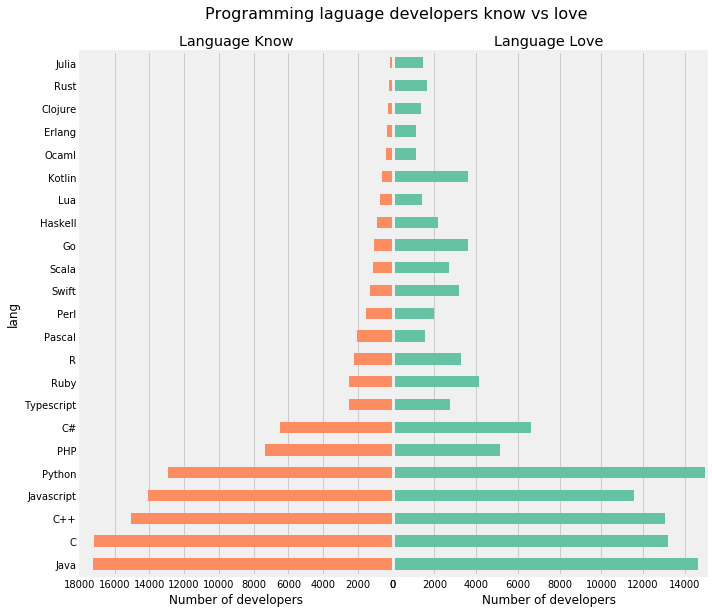

In [107]:
#Visualizing Languages Known to Developers vs they Love
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

sk = pd.DataFrame(skill)
sk = sk.set_index('lang')

color_pal = sns.color_palette("Set2", 11)
# Plot 1
plt.subplot(1, 2, 1)
ax1 = sk['know_val'].plot(kind='barh', figsize=(10, 8), color=color_pal[1], title='Language Know')
ax1_y = ax1.get_yaxis()
ax1_y.set_visible(True)
ax1.set_xlim(0,18000)
ax1.invert_xaxis()
ax1.grid(axis='y')

# Plot 2
plt.subplot(1, 2, 2)
ax2 = sk['Love'].plot(kind='barh', figsize=(10, 8), color=color_pal[0], title='Language Love')
ax2_y = ax2.get_yaxis()
ax2.grid(axis='y')
ax2_y.set_visible(False)
ax2.set_xlim(0,15000)

# Title and make tight
plt.suptitle('Programming laguage developers know vs love', fontsize=16, y=1.03, x=0.555)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
ax1.set_xlabel('Number of developers')
ax2.set_xlabel('Number of developers')
plt.show()


- From the graph it is clear that though more number of developers know Java, C, C++, and JavaScript than Python, Python is the most loved language. That is the reason more developers are showing interest in learning the language.

In [97]:
source = ColumnDataSource(data=dict(names=skill['lang'].values, value=skill['know_val'].values,
                                    my_label=skill['know_val'].values,myl=skill['Love'].values))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'  ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(x_range=skill['lang'].values,y_range = (0,19000), plot_height=750,plot_width = 700, title = "Languages known to developers")
p.vbar(x='names', top='value', width=0.5, color= 'thistle',source=source, legend="Know")
p.title.align = "center"

labels = LabelSet(x='names', y='value', text='my_label', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='center')

p.add_layout(labels)


p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Education'
p.yaxis[0].axis_label = 'Developers (%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_orientation = math.pi/4




p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.y_range.start = 0
p.background_fill_color = "white"


p.line(x=skill['lang'].values, y=skill['Love'].values, color="skyblue", line_width=2, legend="Will Learn")
p.square(x=skill['lang'].values, y=skill['Love'].values, size=5, color="yellow", alpha=0.9)

show(p)

In [109]:
q26 = []
for i in range(len(col)):
    if re.match(r'^(q26)',col[i]):
        q26.append(col[i])


In [115]:
knows = []
learn = []
column = []
kn_us = []
kn_uk = []
kn_stu = []
kn_prof = []
l_us = []
l_uk = []
l_stu = []
l_prof = []
kn_ag=[]
kn_ag1=[]
kn_ag2=[]
for i in q26:
    #print(i)
    column.append(val_map[i]['Survey Question'])
    kn_ag.append(df_c[(df_c[i] == 'Know') & (df_c['q2AgeModified'] == '0 - 18')][i].count())
    kn_ag1.append(df_c[(df_c[i] == 'Know') & (df_c['q2AgeModified'] == '18 - 34')][i].count())
    kn_ag2.append(df_c[(df_c[i] == 'Know') & (df_c['q2AgeModified'] == '35+')][i].count())
    knows.append(df_c[df_c[i] == 'Know'][i].count())
    learn.append(df_c[df_c[i] == 'Will Learn'][i].count())
    kn_us.append(df_c[(df_c[i] == 'Know') & (df_c['CountryNumeric2'].isin(na))][i].count())
    kn_uk.append(df_c[(df_c[i] == 'Know') & (df_c['CountryNumeric2'].isin(uk))][i].count())
    kn_stu.append(df_c[(df_c[i] == 'Know') & (df_c['q8JobLevel'] == 'Student')][i].count())
    kn_prof.append(df_c[(df_c[i] == 'Know') & (df_c['q8JobLevel'] != 'Student')& (str(df_c['q8JobLevel']) != 'nan')][i].count())
    l_us.append(df_c[(df_c[i] == 'Will Learn') & (df_c['CountryNumeric2'].isin(na))][i].count())
    l_uk.append(df_c[(df_c[i] == 'Will Learn') & (df_c['CountryNumeric2'].isin(uk))][i].count())
    l_stu.append(df_c[(df_c[i] == 'Will Learn') & (df_c['q8JobLevel'] == 'Student')][i].count())
    l_prof.append(df_c[(df_c[i] == 'Will Learn') & (df_c['q8JobLevel'] != 'Student')& (str(df_c['q8JobLevel']) != 'nan')][i].count())


c = (knows/sum(knows))*100
g = [ '%.2f%% ' % elem for elem in c ]

c_us = (kn_us/sum(kn_us))*100
g_us = [ '%.2f%% ' % elem for elem in c_us ]

c_uk = (kn_uk/sum(kn_uk))*100
g_uk = [ '%.2f%% ' % elem for elem in c_uk ]

c_stu = (kn_stu/sum(kn_stu))*100
g_stu = [ '%.2f%% ' % elem for elem in c_stu ]

c_prof = (kn_prof/sum(kn_prof))*100
g_prof = [ '%.2f%% ' % elem for elem in c_prof ]

c_l = (learn/sum(learn))*100
g_l = [ '%.2f%% ' % elem for elem in c_l ]

c_usl = (l_us/sum(l_us))*100
g_usl = [ '%.2f%% ' % elem for elem in c_usl ]

c_ukl = (l_uk/sum(l_uk))*100
g_ukl = [ '%.2f%% ' % elem for elem in c_ukl ]

c_stul = (l_stu/sum(l_stu))*100
g_stul = [ '%.2f%% ' % elem for elem in c_stul ]

c_profl = (l_prof/sum(l_prof))*100
g_profl = [ '%.2f%% ' % elem for elem in c_profl ]

q29 = []
for i in range(len(col)):
    if re.match(r'^(q29)',col[i]):
        q29.append(col[i])


    
frame = pd.DataFrame({'lang': column,
        'know_val':knows,'know': c,'North_A':c_us,'Europe':c_uk,'Students':c_stu,'Professionals':c_prof,
    'label':g,'label_us':g_us,'label_uk':g_uk,'label_stu':g_stu,'label_prof':g_prof,'Learn':c_l,'label_l':g_l
                      ,'LearnNorth_A':c_usl,'LearnEurope':c_ukl,'LearnStudents':c_stul,'LearnProfessionals':c_profl,
    'label_usl':g_usl,'label_ukl':g_ukl,'label_stul':g_stul,'label_profl':g_profl, 'Age1':kn_ag,'Age2':kn_ag1,
                      'Age3':kn_ag2,'Love':lov
    })

lov = []      

for i in range(len(q29)):
    for j in range(len(frame)):
        if val_map[q29[i]][0] == frame['lang'][j]:
            lov.append(df_c[df_c[q29[i]] == 'Love'][q29[i]].count())
            
frame = frame.sort_values(by='know',ascending=False)
frame = frame.reset_index()

## Visualizing Frameworks Known to Developers

In [116]:
#Visualizing Frameworks Known to Developers

source = ColumnDataSource(data=dict(names=frame['lang'].values, value=frame['know'].values,my_label=frame['label'].values))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'  ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(x_range=frame['lang'].values,y_range = (0,17), plot_height=750,plot_width = 800, title = "Frameworks known to developers")
p.vbar(x='names', top='value', width=0.5, color= 'thistle',source=source, legend="Know")
p.title.align = "center"



p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Frame'
p.yaxis[0].axis_label = 'Developers (%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_orientation = math.pi/4


labels = LabelSet(x='names', y='value', text='my_label', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='center')

p.add_layout(labels)

p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.y_range.start = 0
p.background_fill_color = "white"


p.line(x=frame['lang'].values, y=frame['Learn'].values, color="skyblue", line_width=2, legend="Will Learn")
p.square(x=frame['lang'].values, y=frame['Learn'].values, size=5, color="olive", alpha=0.9)

show(p)

- React JS and Angular JS are the top frameworks known to developers. And these languages along with React, Django being the on demand frameworks by the industry, developers are willing to master these frameworks.
- Other Frameworks they are interested to learn are Ruby on Rails, React Native, Backbone.js and Vue.js.


## Visualizing framworks known to different categories

In [117]:
#bokeh.io.reset_output()
#bokeh.io.output_notebook()

#Visualizing frameworks known to students and professionals
data = {'Lang' : frame['lang'].tolist(),
        'Students'   : frame['Students'].tolist(),
        'Professionals'   : frame['Professionals'].tolist(),
       'Europe'   : frame['Europe'].tolist(),
        'North_A'   : frame['North_A'].tolist(),
       'a1':frame['Age1'].values,
       'a2':frame['Age2'].values,
       'a3':frame['Age3'].values}

source = ColumnDataSource(data=data)

p = figure(x_range=frame['lang'].tolist(), y_range=(0,20), plot_height=800, title="Languages known to different Students vs Professional",
           toolbar_location= 'right')

p.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Students', width=0.3, source=source,
       color="cornflowerblue", legend=value("Students"),name="Students")

p.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='Professionals', width=0.3, source=source,
       color="khaki", legend=value("Professionals"),name="Professionals")

p.title.text_color = "Green"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Languages'
p.yaxis[0].axis_label = 'Developers (%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

#p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = math.pi/4

p.line(x=frame['lang'].values, y=frame['LearnStudents'].values, color="skyblue", line_width=2, legend="Students willing to learn")
p.square(x=frame['lang'].values, y=frame['LearnStudents'].values, size=5, color="olive", alpha=0.9)

p.line(x=frame['lang'].values, y=frame['LearnProfessionals'].values, color="green", line_width=2, legend="Professionals willing to learn")
p.square(x=frame['lang'].values, y=frame['LearnProfessionals'].values, size=5, color="olive", alpha=0.9)

tab1 = Panel(child=p, title="Students vs Professionals")


#visualizing North America vs Europe
p1 = figure(x_range=frame['lang'].tolist(), y_range=(0,20), plot_height=800, title="Frames known to Developers in North America and Europe",
           toolbar_location= 'right')

p1.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Europe', width=0.3, source=source,
       color="cornflowerblue", legend=value("Europe"),name="Europe")

p1.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='North_A', width=0.3, source=source,
       color="khaki", legend=value("North America"),name="North_A")

p1.title.text_color = "Green"
p1.title.text_font_size = "18px"
p1.xaxis[0].axis_label = 'Languages'
p1.yaxis[0].axis_label = 'Developers (%)'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"

#p.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.legend.orientation = "vertical"
p1.legend.location = "top_right"
p1.xaxis.major_label_orientation = math.pi/4

p1.line(x=frame['lang'].values, y=frame['LearnEurope'].values, color="skyblue", line_width=2, legend="Europeans willing to learn")
p1.square(x=frame['lang'].values, y=frame['LearnEurope'].values, size=5, color="olive", alpha=0.9)

p1.line(x=frame['lang'].values, y=frame['LearnNorth_A'].values, color="green", line_width=2, legend="North Americans willing to learn")
p1.square(x=frame['lang'].values, y=frame['LearnNorth_A'].values, size=5, color="olive", alpha=0.9)


tab2 = Panel(child=p1, title="Europe vs North America")
#Visualizing by age group
p2 = figure(x_range=frame['lang'].tolist(), y_range=(0,6000), plot_height=800,plot_width=700, title="Frameworks known to different age groups",
           toolbar_location= 'right')
p2.vbar(x=dodge('Lang', -0.30,  range=p.x_range), top='a1', width=0.3, source=source,
       color="red", legend="0-18",name="0-18")
p2.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='a2', width=0.3, source=source,
       color="orange", legend="18-34",name="18-34")

p2.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='a3', width=0.3, source=source,
       color="yellow", legend="35+",name="35+")

p2.title.text_color = "Green"
p2.title.text_font_size = "18px"
p2.xaxis[0].axis_label = 'Frameworks'
p2.yaxis[0].axis_label = 'Developers (%)'
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.xgrid.grid_line_color = None
p2.legend.orientation = "vertical"
p2.legend.location = "top_right"
p2.xaxis.major_label_orientation = math.pi/4

tab3 = Panel(child=p2, title="Age Group")

tabs = Tabs(tabs=[ tab1, tab2,tab3 ])

show(tabs)

Stdents  vs Professionals:
-	Students tend to know Node.js, express.js and Django more than professionals.
-	Professionals tend to know Spring, ASP, JSF and Struts more than students.
-	And both student and professionals are willing to learn popular frameworks and other frameworks too.


Europe vs North America:
- North American developers are more interested in Node.js where as more number of European developers know React and Django.
- Also developers from both the continents wants to learn React Native and Vue.js.

Age Group:
- Both young and middle generation master Node.js and AngularJS in large numbers while older generation knows Node.js, AngularJS and .NETCore in same proportion.


In [118]:
#bokeh.io.reset_output()
#bokeh.io.output_notebook()
from bokeh.models.widgets import Panel, Tabs

fram = frame.head(10)

data = {'Lang' : fram['lang'].tolist(),
        'Students'   : fram['Students'].tolist(),
        'Professionals'   : fram['Professionals'].tolist(),
       'Europe'   : fram['Europe'].tolist(),
        'North_A'   : fram['North_A'].tolist(),
       'label_stu':fram['label_stu'].tolist(),
       'label_prof':fram['label_prof'].tolist(),
       'label_uk':fram['label_uk'].tolist(),
       'label_us':fram['label_us'].tolist(),
       'a1':fram['Age1'].values,
       'a2':fram['Age2'].values,
       'a3':fram['Age3'].values}

source = ColumnDataSource(data=data)

#Visualizing by age group
p2 = figure(x_range=fram['lang'].tolist(), y_range=(0,6000), plot_height=800,plot_width=700, title="Top frameworks known to different age groups",
           toolbar_location= 'right')
p2.vbar(x=dodge('Lang', -0.30,  range=p.x_range), top='a1', width=0.3, source=source,
       color="red", legend="0-18",name="0-18")
p2.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='a2', width=0.3, source=source,
       color="orange", legend="18-34",name="18-34")

p2.vbar(x=dodge('Lang',  0.30, range=p.x_range), top='a3', width=0.3, source=source,
       color="yellow", legend="35+",name="35+")

p2.title.text_color = "Green"
p2.title.text_font_size = "18px"
p2.xaxis[0].axis_label = 'Frameworks'
p2.yaxis[0].axis_label = 'Developers (%)'
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.xgrid.grid_line_color = None
p2.legend.orientation = "vertical"
p2.legend.location = "top_right"
p2.xaxis.major_label_orientation = math.pi/4

tab3 = Panel(child=p2, title="Age Group")
#Visulalizing Students vs Professionals
p = figure(x_range=fram['lang'].tolist(), y_range=(0,20), plot_height=800,plot_width=700, title="Frameworks known to Students vs Professional",
           toolbar_location= 'right')

p.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Students', width=0.3, source=source,
       color="gold", legend=value("Students"),name="Students")

p.vbar(x=dodge('Lang',  0.25, range=p.x_range), top='Professionals', width=0.3, source=source,
       color="lightcoral", legend=value("Professionals"),name="Professionals")

label = LabelSet(x='Lang', y='Students', text='label_stu', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='left')
label_p = LabelSet(x='Lang', y='Professionals', text='label_prof', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='right')

p.add_layout(label)
p.add_layout(label_p)
p.title.text_color = "mediumorchid"
p.title.text_font_size = "18px"
p.xaxis[0].axis_label = 'Frameworks'
p.yaxis[0].axis_label = 'Developers (%)'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

#p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = math.pi/4

p.line(x=fram['lang'].values, y=fram['LearnStudents'].values, color="skyblue", line_width=2, legend="Students willing to learn")
p.square(x=fram['lang'].values, y=fram['LearnStudents'].values, size=5, color="olive", alpha=0.9)

p.line(x=fram['lang'].values, y=fram['LearnProfessionals'].values, color="thistle", line_width=2, legend="Professionals willing to learn")
p.square(x=fram['lang'].values, y=fram['LearnProfessionals'].values, size=5, color="olive", alpha=0.9)


taba = Panel(child=p, title="Top 10: Students vs Professionals")



#visualizing Europe vs North America

p1 = figure(x_range=fram['lang'].tolist(), y_range=(0,20), plot_height=800,plot_width=700, title="Frameworks known to Developers in North America and Europe",
           toolbar_location= 'right')

p1.vbar(x=dodge('Lang',  0.0,  range=p.x_range), top='Europe', width=0.3, source=source,
       color="gold", legend=value("Europe"),name="Europe")

p1.vbar(x=dodge('Lang',  0.25, range=p.x_range), top='North_A', width=0.3, source=source,
       color="lightcoral", legend=value("North America"),name="North_A")

label_k = LabelSet(x='Lang', y='Europe', text='label_uk', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='right')
label_s = LabelSet(x='Lang', y='North_A', text='label_us', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='left')

p1.add_layout(label_k)
p1.add_layout(label_s)
p1.title.text_color = "mediumorchid"
p1.title.text_font_size = "18px"
p1.xaxis[0].axis_label = 'Frameworks'
p1.yaxis[0].axis_label = 'Developers (%)'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"

#p.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.legend.orientation = "vertical"
p1.legend.location = "top_right"
p1.xaxis.major_label_orientation = math.pi/4

p1.line(x=fram['lang'].values, y=fram['LearnEurope'].values, color="skyblue", line_width=2, legend="Europeans willing to learn")
p1.square(x=fram['lang'].values, y=fram['LearnEurope'].values, size=5, color="olive", alpha=0.9)

p1.line(x=fram['lang'].values, y=fram['LearnNorth_A'].values, color="thistle", line_width=2, legend="North Americans willing to learn")
p1.square(x=fram['lang'].values, y=fram['LearnNorth_A'].values, size=5, color="olive", alpha=0.9)

tabb = Panel(child=p1, title="Top 10: Europe vs North America")


#Visualizing Frameworks Known to Developers

source = ColumnDataSource(data=dict(names=fram['lang'].values, value=skil['know'].values,my_label=skil['label'].values))
hover = HoverTool(tooltips=[
        ( 'names',   '@names'  ),
        ( 'value',  '@value' ),
    ])
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p3 = figure(x_range=fram['lang'].values,y_range = (0,17), plot_height=800,plot_width = 700, title = "Frameworks known to developers",toolbar_location= 'right', tools=[hover, TOOLS])
p3.vbar(x='names', top='value', width=0.4, color= 'mediumseagreen',source=source)
p3.title.align = "center"

p3.title.text_color = "mediumorchid"
p3.title.text_font_size = "18px"
p3.xaxis[0].axis_label = 'Frameworks'
p3.yaxis[0].axis_label = 'Developers (%)'
p3.xaxis.axis_label_text_font_size = "12pt"
p3.yaxis.axis_label_text_font_size = "12pt"
p3.xaxis.major_label_orientation = math.pi/4


labels = LabelSet(x='names', y='value', text='my_label', level='glyph',
              x_offset=5, y_offset=5,text_font_size="7pt", text_color="#555555", source=source, render_mode='canvas',text_align='center')

p3.add_layout(labels)

p3.xgrid.grid_line_color = None
p3.legend.orientation = "vertical"
p3.legend.location = "top_right"
p3.y_range.start = 0
p3.background_fill_color = "white"

p3.line(x=fram['lang'].values, y=fram['Learn'].values, color="peachpuff", line_width=2, legend="Will Learn")
p3.square(x=fram['lang'].values, y=fram['Learn'].values, size=5, color="olive", alpha=0.9)


tabc = Panel(child=p3, title="Top 10 Frameworks Known to Developers")



taball = Tabs(tabs=[ tabc,taba, tabb,tab3 ])

show(taball)

/opt/conda/lib/python3.6/site-packages/bokeh/models/plots.py:725: UserWarning:


You are attemptings to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.


/opt/conda/lib/python3.6/site-packages/bokeh/models/plots.py:725: UserWarning:


You are attemptings to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.




## Visualizing frameworks known to developers vs they love

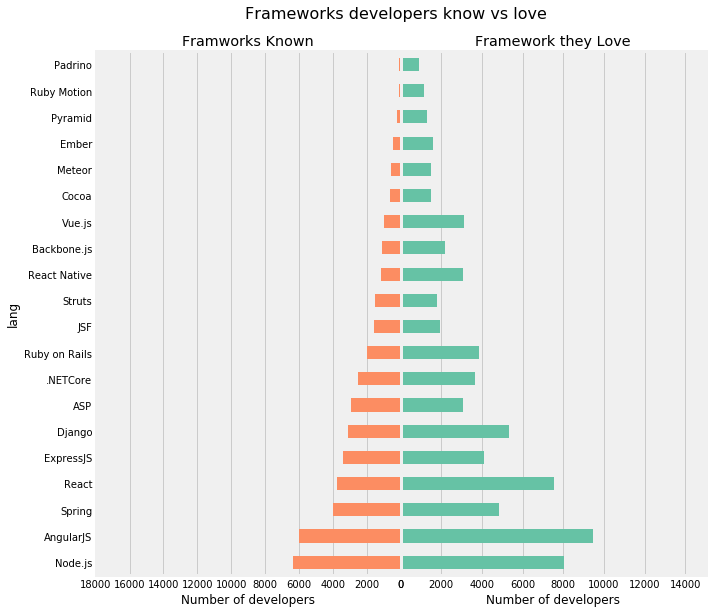

In [120]:
#Visualizing frameworks Known to Developers vs they Love
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

sk = pd.DataFrame(frame)
sk = sk.set_index('lang')

color_pal = sns.color_palette("Set2", 11)
# Plot 1
plt.subplot(1, 2, 1)
ax1 = sk['know_val'].plot(kind='barh', figsize=(10, 8), color=color_pal[1], title='Framworks Known')
ax1_y = ax1.get_yaxis()
ax1_y.set_visible(True)
ax1.set_xlim(0,18000)
ax1.invert_xaxis()
ax1.grid(axis='y')

# Plot 2
plt.subplot(1, 2, 2)
ax2 = sk['Love'].plot(kind='barh', figsize=(10, 8), color=color_pal[0], title='Framework they Love')
ax2_y = ax2.get_yaxis()
ax2.grid(axis='y')
ax2_y.set_visible(False)
ax2.set_xlim(0,15000)

# Title and make tight
plt.suptitle('Frameworks developers know vs love', fontsize=16, y=1.03, x=0.555)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
ax1.set_xlabel('Number of developers')
ax2.set_xlabel('Number of developers')
plt.show()

- AngualarJS is the most liked framework among developers following Node.js and React.

## CONCLUSION

- The younger generation are more interested in joining coding community like Hackerrank,learning new langauges, and sharpen their coding skills.
- More than half of the developers are inclined towards self learning.
- Almost 90% of developers are from Computer Science, STEM related courses.
- Most popular language that today's developers wants to learn and love is Python.
- AngularJS, React, Node.js are popular frameworks.


## FUTURE DIRECTION

- This dataset could be analyzed in various other dimensions to get more insights.
- We can implement machine learning algorithms to analyze or cluster various types of developers.


## References
- https://research.hackerrank.com/developer-skills/2018
- https://plot.ly/python/  
- https://bokeh.pydata.org/en/latest/

In [ ]:
#Viz